Geodesic rotation distance: 0.7151 radians


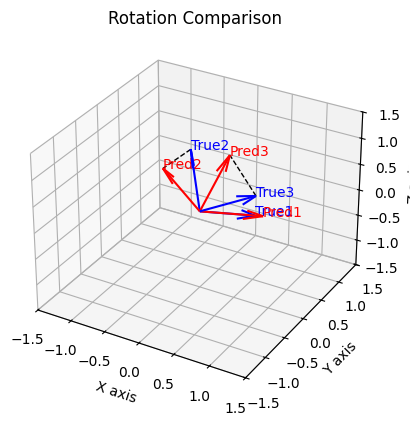

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rotation_distance(R_true, R_pred):
    # Compute the relative rotation
    R_error = np.dot(R_true.T, R_pred)
    
    # Calculate the angle of the axis-angle representation
    trace_value = np.trace(R_error)
    angle = np.arccos((trace_value - 1) / 2)
    return angle

def plot_axes(ax, R, origin, label, color='b'):
    for i in range(3):
        ax.quiver(*origin, *R[:, i], color=color, length=1.0, normalize=True)
        ax.text(*(R[:, i] + origin), f'{label}{i+1}', color=color)

# Example rotation matrices
R_true = np.array([[0.36, -0.48,  0.8 ],
                   [0.8 ,  0.60,  0.   ],
                   [-0.48, 0.64,  0.60]])

R_pred = np.array([[0.5, -0.84,  0.2],
                   [0.76,  0.5,   0.41],
                   [-0.41, 0.2,   0.89]])

# Calculate the rotational distance
distance = rotation_distance(R_true, R_pred)
print(f"Geodesic rotation distance: {distance:.4f} radians")

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', aspect='auto')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

origin = np.array([0, 0, 0])

# Plot true rotation
plot_axes(ax, R_true, origin, 'True', color='b')

# Plot predicted rotation
plot_axes(ax, R_pred, origin, 'Pred', color='r')

# Set axis labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title("Rotation Comparison")

# Adding a visual representation of the distance
# Assuming each column of R_true and R_pred is an axis of a local coordinate system
for i in range(3):
    ax.plot([R_true[0, i], R_pred[0, i]], [R_true[1, i], R_pred[1, i]], [R_true[2, i], R_pred[2, i]], 'k--', linewidth=1)

plt.show()